# Execution Probability

The main purpose of the project is accurate modeling of order flows and queueing processes in exchange market. The project contains reasonable application of state of the art techniques in arrival processes and testing the power of the statistical models for the purpose. For the data, BIST stock exchange market from 2017 will be used. For the implementation, Monte Carlo simulations and goodness of fit tests will be performed. Software side of the project will be based on Probability Distributions such as Exponential, Weibull, q-Exponential distributions and Stochastic Processes such as Point process and Hawkes process. The outcome of the project will be revealing out the main statistical and computational properties of BIST and ITCH stock exchange market orders and trades. We will use machine learning models such as Logistic Regression, Decision trees and Neural Networks to learn whether an order is executed based on the orders executed or not in the previous time steps and the features of the stock market at that time. 

We worked on [*A Stochastic Model for Order Book Dynamics*](https://drive.google.com/open?id=0B-rEeFfZXTBASkZUT0FYZVpxWVU) paper until now. The techniques which are presented in the paper for the dynamics of the order book are applied on the real daily data from Borsa Istanbul.

# _Python in Execution Probability_

In order to plot the results, we used Matplotlib library of Python. For mathematical operations Numpy library is used. To fit distributions to data, we used Scipy library. Garanti data is obtained by adding necessary structures to [*GitHub Itch Repository*](https://github.com/martingale/Itch). In order to fit distributions to data, Scipy library is used. In Scipy.Stats, there are a lot of examples of continuous, multivariate and discrete distributions. We used Weibull, Exponential, Beta and Gamma distributions from the library. These distributions have fit and pdf functions. Firstly normalized data is sent as a parameter to fit function. Fit function returns required parameters for that distribution. Then using Matplotlib's _hist( )_ function we represent the data as histogram. Also we normalized histogram data to show probabilities for the data (Total area in histogram is 1). After finding the required parameters, we use _pdf( )_ function to draw probability density function of the distribution which fits the data. Then we used kstest (Kolmogorov-Smirnov Test) in Scipy.Stats library to test the goodness of fit. This function takes data, distribution name and the parameters that the _fit( )_ function found.

# Orders in Exchange Market

This limit order book is taken from Borsa Istanbul data of Garanti on September 20. There are three types of orders: Add, Cancel and Execute. Add orders are limit orders and Execute orders are market orders. While add orders increases the quantity in the table, cancel and execute orders decreases the quantity.

## 1.1. Execute Orders

According to [*A Stochastic Model for Order Book Dynamics*](https://drive.google.com/open?id=0B-rEeFfZXTBASkZUT0FYZVpxWVU) paper, The highest buy price is bid price $Pb(t)$ and lowest sell price is ask price $Pa(t)$. If there is a sell order with price $Pb(t)$, the order is immediately executed. If there is a buy order with price $Pa(t)$, it is also immediately executed. This type of orders are named as market orders. In our code, they are execute orders. The quantity changes of execute orders with time can be observed below for Garanti on September 20. 

In [1]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import lob
import matplotlib.pyplot as plt
import time
import numpy as np
from orderFeatures import orderFeatures
import scipy
import scipy.stats as stats
import math

Populating the interactive namespace from numpy and matplotlib


The code below is executed from Itch file to prepare data. It takes nearly a minute to complete. 

> Attention: Please change the file directory when creating a lob object !

> Attention: The code will run about 1 minute and print a lot of things, use with caution

In [2]:
start_time = time.time()
garantiLob = lob.lob('GARAN.E', '/Users/canaltinigne/Desktop/pyITCH/20170920i1p1.itch')

print("Lob finished in %s seconds" % (time.time() - start_time))

Lob finished in 63.62042999267578 seconds


In [2]:
print(orderFeatures)

{'thetasForBuyCancelOrder': [0, 96151766880.99997, 69307577586.42857, 30444614791.999992, 9061456386.57143, 6636615934.285713, 3935208449.142857, 1262825138.142857, 5851052773.428571, 1224858490.0, 1812021780.5714285, 843947554.2857143, 2256413026.142857, 291462192.4285714, 101424141.42857143, 318654939.85714287, 424515548.0, 531187326.14285713, 271571707.42857146, 1017742.8571428572, 0, 714.4285714285714, 7189.428571428572, 10721.42857142857, 7.142857142857143, 28.571428571428573, 3582173.285714286, 55198.0, 182453.57142857142, 66648.14285714287, 1263.7142857142858, 7589466.857142858, 0, 10725.0, 21839.285714285714, 4110.857142857143, 4014.4285714285716, 0, 0, 0.14285714285714285, 0, 0, 0, 0, 0, 0, 0, 0, 1070100.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15714.57142857143, 0, 0, 0, 0, 0, 0, 0, 0], 'lambdasForLimitSellOrderHourly': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

We can access quantity features from variable *orderFeatures* in lob class.

### 1.1.1. Change in Execute Order Quantities

In this chart, total buy and sell quantities are shown with respect to time. Since the exchange market is closed between 1pm and 2pm, the execute orders between that interval are omitted.

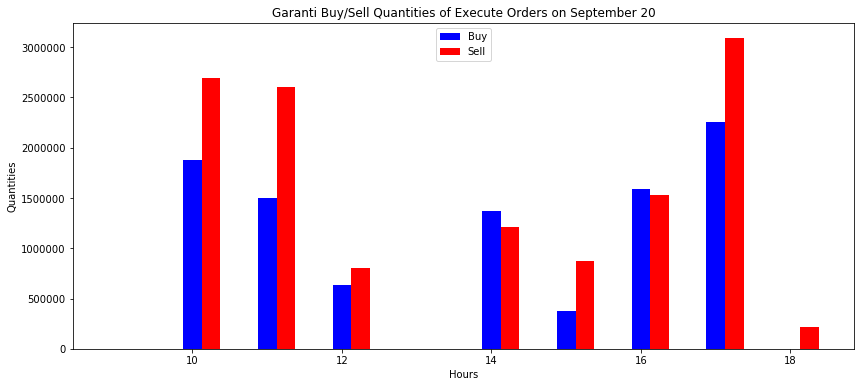

In [3]:
X = np.arange(9,19)

plt.figure(1)  # to let the index start at 1
plt.bar(X + 0.00, orderFeatures['executeBuyQuantity'], color='b', width=0.25, label='Buy')
plt.bar(X + 0.25, orderFeatures['executeSellQuantity'], color='r', width=0.25, label='Sell')
plt.title('Garanti Buy/Sell Quantities of Execute Orders on September 20')
plt.xlabel('Hours')
plt.ylabel('Quantities')
plt.legend(loc=9)

### 1.1.2. Arrival Rate of Execute Orders

According to [*A Stochastic Model for Order Book Dynamics*](https://drive.google.com/open?id=0B-rEeFfZXTBASkZUT0FYZVpxWVU) paper, Market buy (respectively sell) orders arrive at independent, exponential times with rate μ. With Maximum Likelihood Estimation approach, this rate for Garanti data can be calculated by finding the mean of the hourly quantities.

$μSell(t) = 1626992.0$ quantities per hour.

$μBuy(t) = 1373500.29$ quantities per hour.

> Zero values are ignored since it happens when the market is closed !

In [4]:
executeSellRate = np.mean([x for x in orderFeatures['executeSellQuantity'] if x != 0])
print("μ(Sell): {} quantities per hour.".format(executeSellRate))
executeBuyRate = np.mean([x for x in orderFeatures['executeBuyQuantity'] if x != 0])
print("μ(Buy):  {:.9} quantities per hour.".format(executeBuyRate))

μ(Sell): 1626992.0 quantities per hour.
μ(Buy):  1373500.29 quantities per hour.


## 1.2. Limit orders

"A limit order sits in the order book until it is either executed against a market order or it is canceled. A limit order may be executed very quickly if it corresponds to a price near the bid and the ask, but may take a long time if the market price moves away from the requested price or if the requested price is too far from the bid/ask." (Cont et al, 2010). 

[*A Stochastic Model for Order Book Dynamics*](https://drive.google.com/open?id=0B-rEeFfZXTBASkZUT0FYZVpxWVU)

### 1.2.1. Arrival Rate of Limit Orders

According to A Stochastic Model for Order Book Dynamics paper, Limit buy (respectively sell) orders arrive at a distance of i ticks from the opposite best quote at independent, exponential times with rate lambda. If there is a limit buy order we need to find the price's distance from best ask price, for limit sell order we need to find the price's distance from best bid price. This distance gives us i ticks. With Maximum Likelihood Estimation, the arrival rates will be total quantity in these i ticks divided by total hours. 

> 9am - 10am, 1pm-2pm and after 6pm, the limit orders are omitted.

### 1.2.2. Graph of Arrival Rates for Limit Orders

X axis show the distances from the best ask price $Pa(t)$ and the best bid price $Pb(t)$ respectively. It starts from 1 and goes to 67. Y axis shows sum of daily quantities which came to that distance daily divided by seven hours.

<Container object of 66 artists>

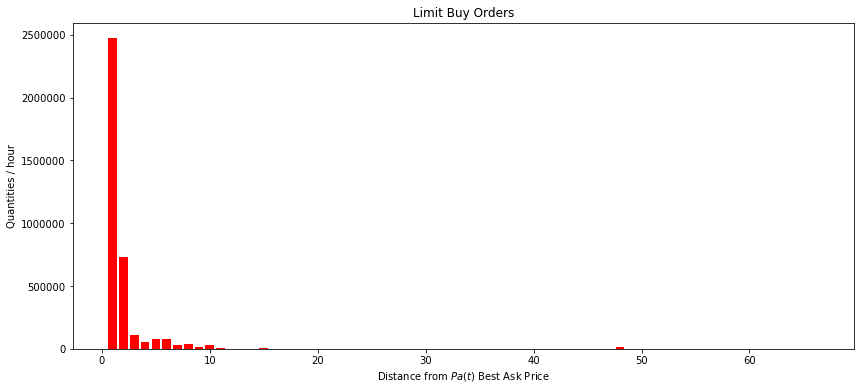

In [5]:
# Buy orders 

X = np.arange(1,67)

plt.figure(1)
plt.title('Limit Buy Orders')
plt.xlabel('Distance from $Pa(t)$ Best Ask Price')
plt.ylabel('Quantities / hour')
plt.bar(X, orderFeatures['lambdasForLimitBuyOrder'][1:], color='r')

<Container object of 66 artists>

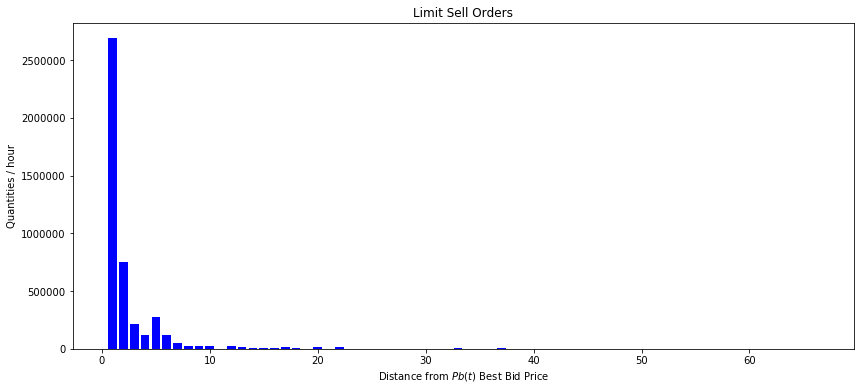

In [6]:
# Sell orders

X = np.arange(1,67)

plt.xlabel('Distance from $Pb(t)$ Best Bid Price')
plt.title('Limit Sell Orders')
plt.ylabel('Quantities / hour')
plt.bar(X, orderFeatures['lambdasForLimitSellOrder'][1:], color='b')

### 1.2.3. Change in Limit Order Quantities

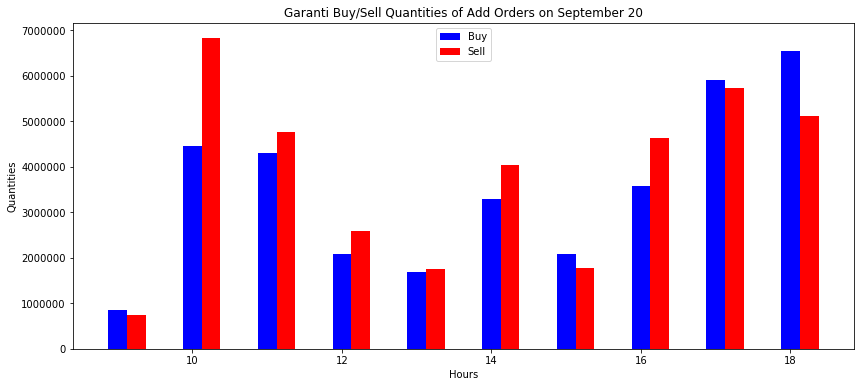

In [7]:
X = np.arange(9,19)

plt.figure(1)  
plt.bar(X + 0.00, orderFeatures['addBuyQuantity'], color='b', width=0.25, label='Buy')
plt.bar(X + 0.25, orderFeatures['addSellQuantity'], color='r', width=0.25, label='Sell')
plt.title('Garanti Buy/Sell Quantities of Add Orders on September 20')
plt.xlabel('Hours')
plt.ylabel('Quantities')
plt.legend(loc=9)

## 1.3. Cancel orders 

"Cancellations of limit orders at a distance of i ticks from the opposite best quote occur at a rate proportional to the number of outstanding orders: If the number of outstanding orders at that level is x, then the cancellation rate is . This assumption can be understood as follows: if we have a batch of x outstanding orders, each of which can be canceled at an exponential time with parameter ϴ(i), then the overall cancellation rate for the batch is ϴ(i)x." (Cont et al, 2010). 

[*A Stochastic Model for Order Book Dynamics*](https://drive.google.com/open?id=0B-rEeFfZXTBASkZUT0FYZVpxWVU)

### 1.3.1. Graph of Arrival Rates for Cancel Orders 

X axis show the distances from the best ask price Pa(t) and the best bid price Pb(t) respectively. It starts from 1 and goes to 67. Y axis shows sum of daily quantities which came to that distance daily divided by seven hours.

<Container object of 66 artists>

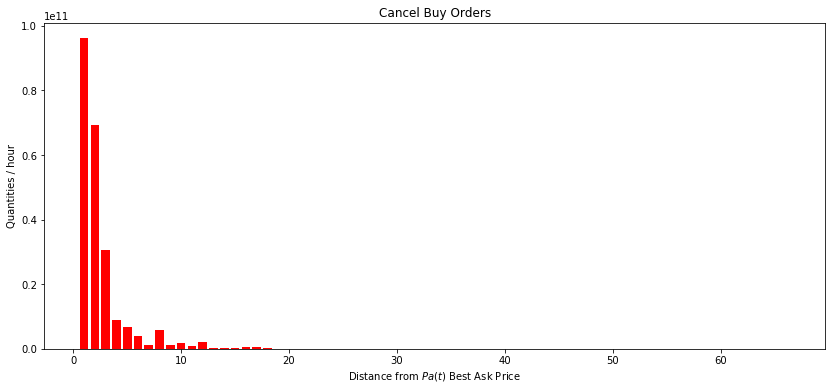

In [8]:
# Buy orders 

X = np.arange(1,67)

plt.figure(1)
plt.title('Cancel Buy Orders')
plt.xlabel('Distance from $Pa(t)$ Best Ask Price')
plt.ylabel('Quantities / hour')
plt.bar(X, orderFeatures['thetasForBuyCancelOrder'][1:], color='r')

<Container object of 66 artists>

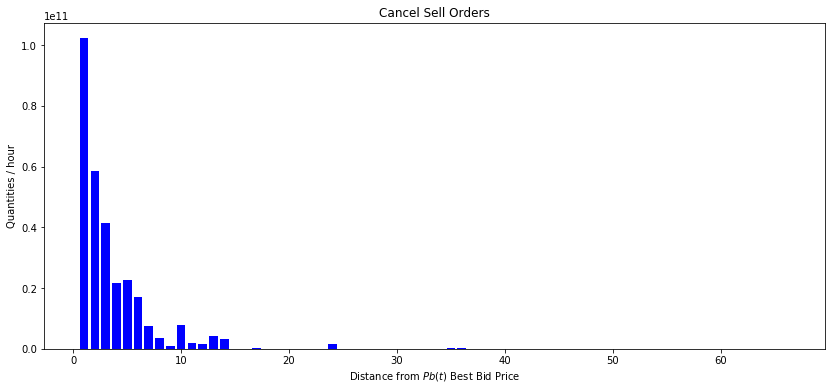

In [9]:
# Sell orders

X = np.arange(1,67)

plt.xlabel('Distance from $Pb(t)$ Best Bid Price')
plt.title('Cancel Sell Orders')
plt.ylabel('Quantities / hour')
plt.bar(X, orderFeatures['thetasForSellCancelOrder'][1:], color='b')

When I find the theta values, I multiplied the quantity in the cancel order with the quantity in that price in the latest order book which is the last order book just before the cancel order came. Then I used Maximum Likelihood Estimation and divide total values by 7 since there are 7 hours of operation.

> 9am - 10am, 1pm-2pm and after 6pm, the cancel orders are omitted.


## 1.4. Hourly Order Graphs

X axis show the distances from the best ask price Pa(t) and the best bid price Pb(t). It starts from 1 and goes to 10 for hourly orders. Y axis shows the quantities during that hour.

### 1.4.1 Hourly Limit Buy Orders

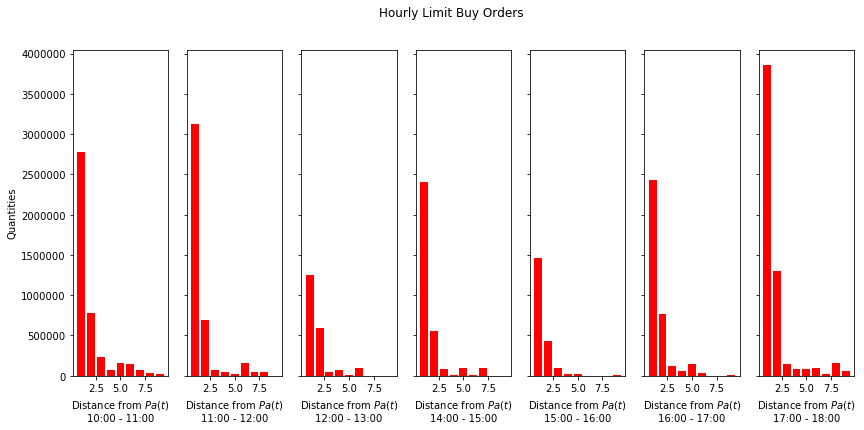

In [10]:
def hourly_orders(arr, buyOrSell, title):
    
    price = '$Pa(t)$'
    
    if buyOrSell:
        cl = 'r'
    else:
        cl = 'b'
        price = '$Pb(t)$'
        
    hours = ['10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00']
    n_hours = [10, 11, 12, 14, 15, 16, 17]
    
    x = np.arange(1,10)
    min_hour=9
    f, axes = plt.subplots(1, 7, sharey=True)
    f.suptitle(title)
    axes[0].set_ylabel("Quantities")
    
    
    for i in range(7):
        if i < 3:
            axes[i].set_xlabel('Distance from {}\n{} - {}'.format(price, hours[i], hours[i+1]))
        else:
            axes[i].set_xlabel('Distance from {}\n{} - {}'.format(price, hours[i+1], hours[i+2]))
        
        axes[i].bar(x, arr[n_hours[i]-min_hour][1:10], color=cl)
    
hourly_orders(orderFeatures['lambdasForLimitBuyOrderHourly'], True, 'Hourly Limit Buy Orders')

### 1.4.2. Hourly Limit Sell Orders

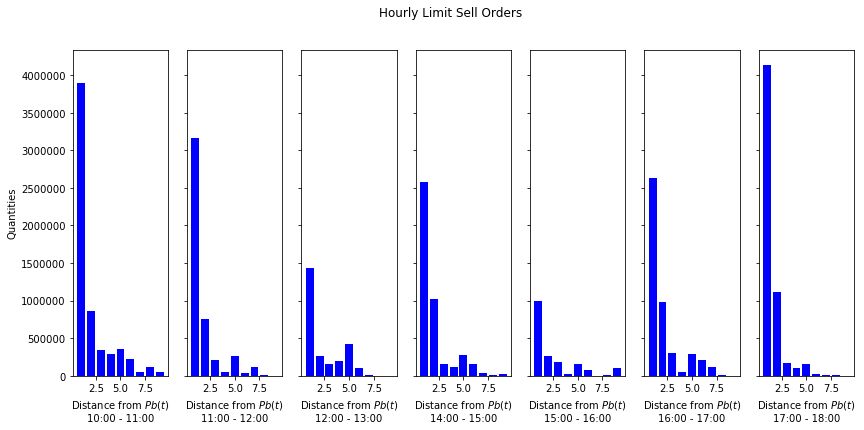

In [11]:
hourly_orders(orderFeatures['lambdasForLimitSellOrderHourly'], False, 'Hourly Limit Sell Orders')

### 1.4.3. Hourly Cancel Buy Orders 

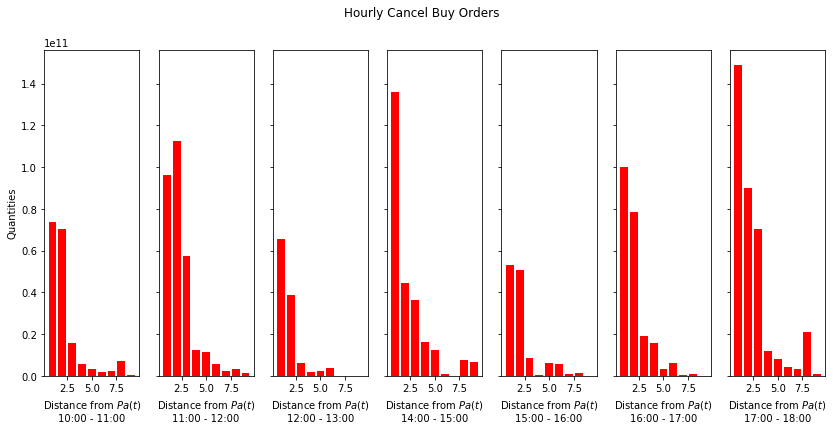

In [12]:
hourly_orders(orderFeatures['thetasForBuyCancelOrderHourly'], True, 'Hourly Cancel Buy Orders')

### 1.4.4. Hourly Cancel Sell Orders

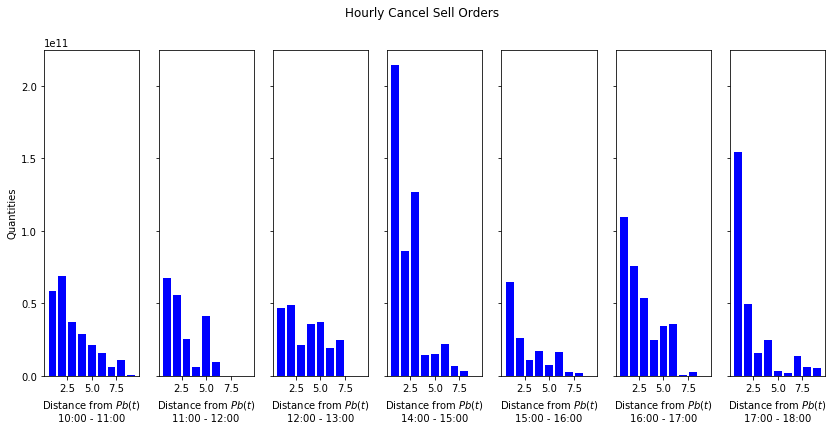

In [13]:
hourly_orders(orderFeatures['thetasForSellCancelOrderHourly'], False, 'Hourly Cancel Sell Orders')

# 2. Fitting Some Distributions to Dataset

We used Exponential Distribution, Beta Distribution, Weibull Distribution and Gamma Distribution to fit limit and cancel orders. We tried to fit mean of the orders and hourly orders.

Firstly _normalizer( )_ function takes data from first 10 ticks from the best prices since the quantities become almost zero after ten ticks. This function divides the data by 1e8 if it is from cancel orders and by 100 if it is from limit orders. Then it has 10 values indexed from 1 to 10. We created a new array and add index values to new array using count data. For example, the normalized array is [1000, 200, 100, 50]. Then we add 1 to new array 1000 times and add 2 to new array 200 times. Our new array becomes [1, 1, ....... 1, 2, 2, ...... 2, 3 .....]. We used this array to fit distributions to data.

For goodness of fit tests, Kolmogorov-Smirnov tests were used. Kolmogorov-Smirnov test finds the largest distance in vertical direction between the cdf of the hypothesized distribution and the empirical distribution function of the observed data. Then it returns test statistics. One of the return values is p value. If it is higher than 0.05, we can say the observed data comes from hypothesized distribution. If it is lower we reject the null hypothesis and we say that distribution can not fit the observed data.

When we apply Kolmogorov-Smirnov test on the new array which we create from count data, the results were always zero. However, when we apply tests on count data which was an array that keeps count data from the first tick to tenth tick, the results were more fulfilling.

Below you can see hypothesized distribution parameters and test results for every distribution.

In [56]:
def normalizer(data, cancel, min_val, max_val, beta):
    
    minimum = min_val
    maximum = max_val
    rng = maximum - minimum
    y = data[minimum:maximum+1]
    
    if cancel:
        normalization = 100000000
    else:
        normalization = 100  
    
    nor_y = [round(a/normalization) for a in y]
    
    count_list = []
    k = 1
  
    for i in nor_y:
        for j in range(i):
            count_list.append(k)
        k = k + 1
        
    return count_list

## 2.1. Fitting Exponential Distribution to Dataset

In [41]:
def fit_exp_dist_and_test(data, cancel, buyOrSell, title):
    
    ks = data[1:10]
    data = normalizer(data, cancel, 1, 10, False)
    
    price = '$Pb(t)$ Best Bid Price'
    
    if buyOrSell:
        price = '$Pa(t)$ Best Ask Price'
    
    plt.scatter(np.arange(1,10), ks/sum(ks), color='red')
    plt.xlabel('Distance from ' + price)
    plt.title(title)
    plt.ylabel('Quantity Densities')
    params = stats.expon.fit(data) 
    
    x = np.linspace(1, 10, len(data))
    expon_pdf = stats.expon.pdf(x, *params)
    
    plt.plot(x, expon_pdf)
    print("Lambda: {}".format(params[1]))
    
    np.random.seed(987654321)
    print(stats.kstest(data, 'expon', args=params))

### 2.1.1. Fitting Exponential Distribution on Limit Buy Orders

Lambda: 0.7187539857304082
KstestResult(statistic=0.68095120108869611, pvalue=0.0)


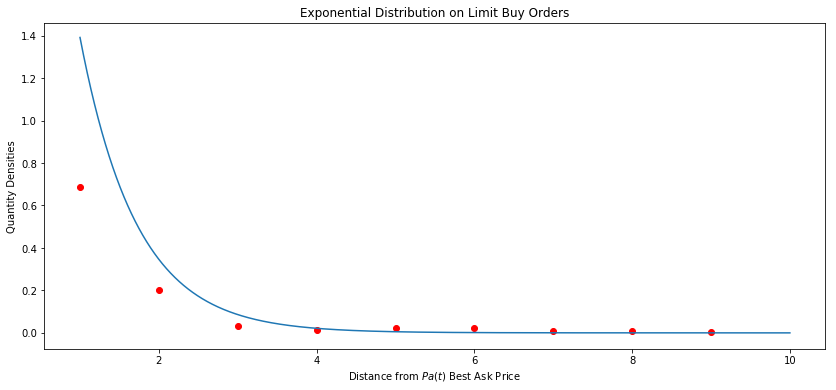

In [42]:
fit_exp_dist_and_test(orderFeatures['lambdasForLimitBuyOrder'], False, 
                      True, 'Exponential Distribution on Limit Buy Orders')

### 2.1.2. Fitting Exponential Distribution on Limit Sell Orders

Lambda: 0.9515576103591705
KstestResult(statistic=0.62848065595447022, pvalue=0.0)


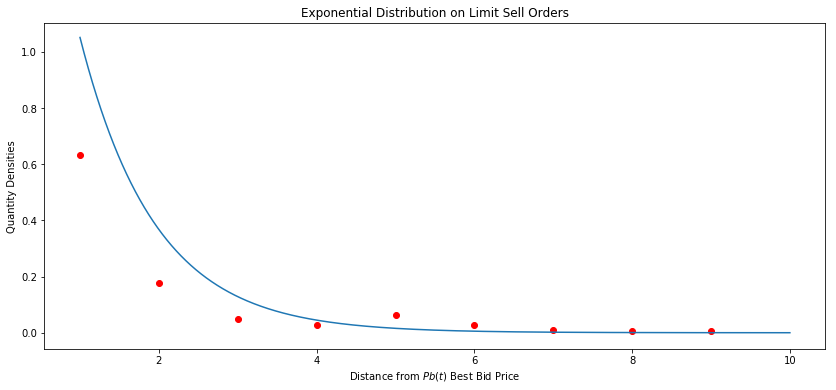

In [20]:
fit_exp_dist_and_test(orderFeatures['lambdasForLimitSellOrder'], False,
                     False, 'Exponential Distribution on Limit Sell Orders')

### 2.1.3. Fitting Exponential Distribution on Cancel Buy Orders

Lambda: 1.2623139353459694
KstestResult(statistic=0.42622950692109429, pvalue=0.0)


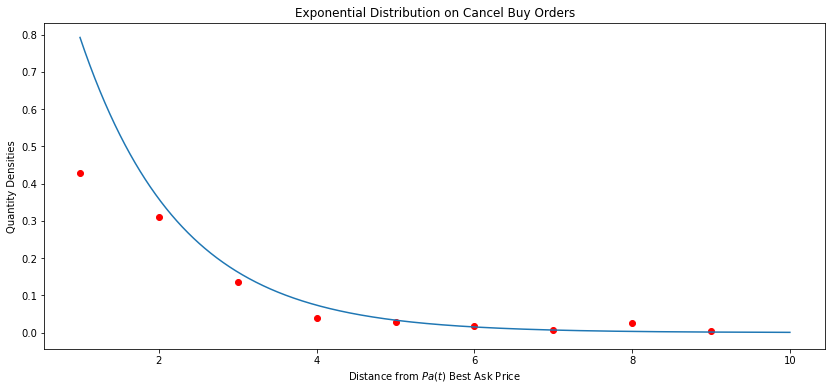

In [21]:
fit_exp_dist_and_test(orderFeatures['thetasForBuyCancelOrder'], True,
                     True, 'Exponential Distribution on Cancel Buy Orders')

### 2.1.4. Fitting Exponential Distribution on Cancel Sell Orders

Lambda: 1.8687496093833904
KstestResult(statistic=0.36097388593697188, pvalue=3.5671539629738e-321)


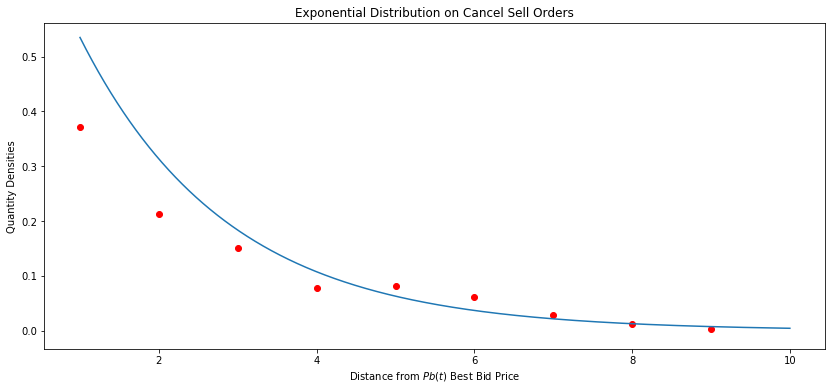

In [22]:
fit_exp_dist_and_test(orderFeatures['thetasForSellCancelOrder'], True,
                     False, 'Exponential Distribution on Cancel Sell Orders')

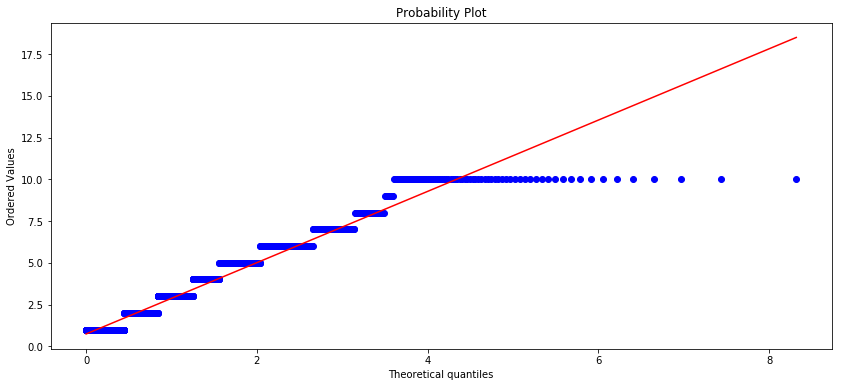

In [23]:
import pylab 

y = normalizer(orderFeatures['thetasForSellCancelOrder'], True, 1, 10, False)
#y = np.random.exponential(0.05, 10000)
stats.probplot(y, dist="expon", plot=pylab)
pylab.show()

### 2.1.5. Fitting Exponential Distribution on Hourly Graphs

In [25]:
def hourly_graph_fit_exp_dist_and_test(data, cancel, title, buy):
        
    min_hour=9
    
    f, axes = plt.subplots(1, 7, sharey=True)
    f.suptitle('Exponential Distribution on Hourly ' + title)
    hours = [10, 11, 12, 14, 15, 16, 17, 18]
    axes[0].set_ylabel("Quantity Densities")
    
    price = '$Pb(t)$'
    
    if buy:
        price='$Pa(t)$'
    
   
    for i in range(len(axes)):
        
        dat = data[hours[i]-min_hour]
        ks = dat[1:11]
        dt = normalizer(dat, cancel, 1, 10, False)
    
        # Plot the histogram.
        axes[i].scatter(np.arange(1,11), ks/sum(ks), color='red')
        #axes[i].hist(dt, bins=arange(1,11), normed=True)
        params = stats.expon.fit(dt) 
    
        start = stats.expon.ppf(0.01, *params)
        end = stats.expon.ppf(0.99, *params)

        x = np.linspace(start, 10, len(dt))
        y = stats.expon.pdf(x, *params)
        axes[i].plot(x, y)
    
        np.random.seed(987654321)
        test_res = stats.kstest(dt, 'expon', args=params)
        axes[i].set_title("{}:00 - {}:00".format(hours[i], hours[i+1]))
        axes[i].set_xlabel("Distance from {}\n\nlambda: {:.4f}\nst: {:.4f}\np val: {:.4f}".format(price, params[-1], test_res[0], test_res[1]))

#### 2.1.5.1. Fitting Exponential Distribution to Hourly Limit Buy Orders

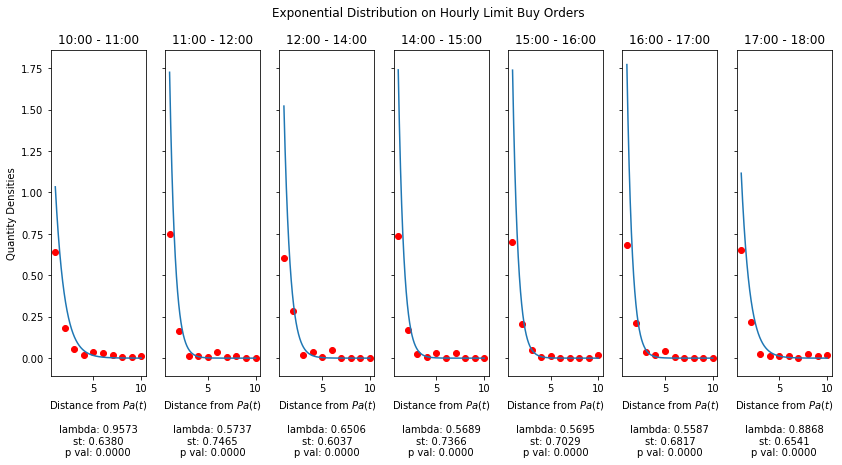

In [26]:
hourly_graph_fit_exp_dist_and_test(orderFeatures['lambdasForLimitBuyOrderHourly'], False, 'Limit Buy Orders', True)

#### 2.1.5.2. Fitting Exponential Distribution to Hourly Limit Sell Orders

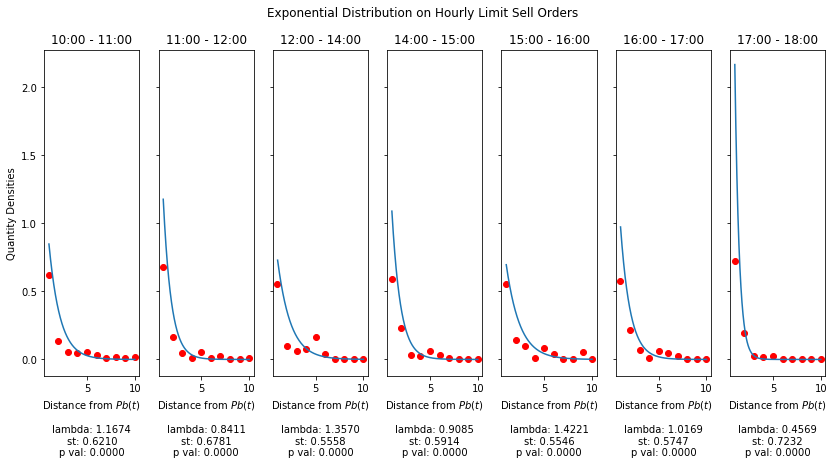

In [27]:
hourly_graph_fit_exp_dist_and_test(orderFeatures['lambdasForLimitSellOrderHourly'], False, 'Limit Sell Orders', False)

#### 2.1.5.3. Fitting Exponential Distribution to Hourly Cancel Buy Orders

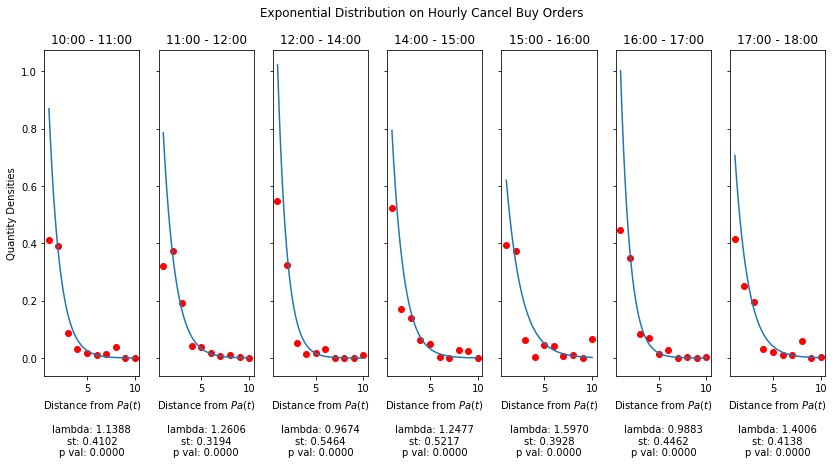

In [28]:
hourly_graph_fit_exp_dist_and_test(orderFeatures['thetasForBuyCancelOrderHourly'], True, 'Cancel Buy Orders', True)

#### 2.1.5.4. Fitting Exponential Distribution to Hourly Cancel Sell Orders

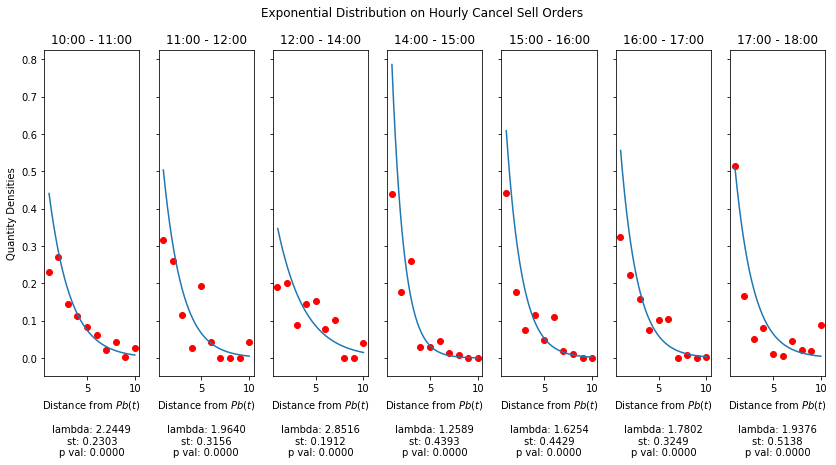

In [29]:
hourly_graph_fit_exp_dist_and_test(orderFeatures['thetasForSellCancelOrderHourly'], True, 'Cancel Sell Orders', False)

## 2.2. Fitting Beta Distribution to Current Dataset

Data needs to be in the interval between 0 and 1. 

In [57]:
def fit_beta_dist_and_test(data, cancel, buyOrSell, title):
    
    ks = data[1:11]
    
    data = normalizer(data, cancel, 1, 10, True)
    
    params = stats.beta.fit(data, floc=0) 
    
    price = '$Pb(t)$ Best Bid Price'
    
    if buyOrSell:
        price = '$Pa(t)$ Best Ask Price'

    plt.xlabel('Distance from ' + price)
    plt.title(title)
    plt.ylabel('Quantity Densities')
    plt.scatter(np.arange(1,11), ks/sum(ks), color='red')
    
    x = np.linspace(0, 10, len(data))
    y = stats.beta.pdf(x, *params)
    plt.plot(x, y)
        
    np.random.seed(987654321)
    print("a = {}, b = {}".format(params[0], params[1]))
    print(stats.kstest(data, 'beta', args=params))

### 2.2.1. Fitting Beta Distribution on Limit Buy Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


a = 2.440100246951177, b = 1858032.5028433423
KstestResult(statistic=0.39082662869686347, pvalue=0.0)


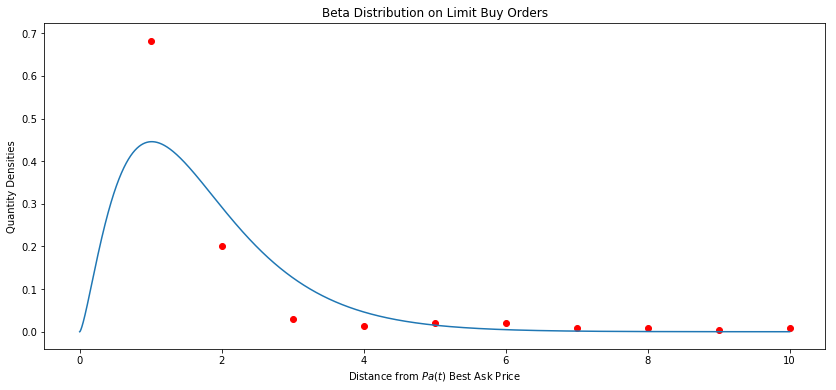

In [58]:
fit_beta_dist_and_test(orderFeatures['lambdasForLimitBuyOrder'], False,
                      True, 'Beta Distribution on Limit Buy Orders')

### 2.2.2. Fitting Beta Distribution on Limit Sell Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


a = 2.1666841773680545, b = 34785164237355.875
KstestResult(statistic=0.37102779502057814, pvalue=0.0)


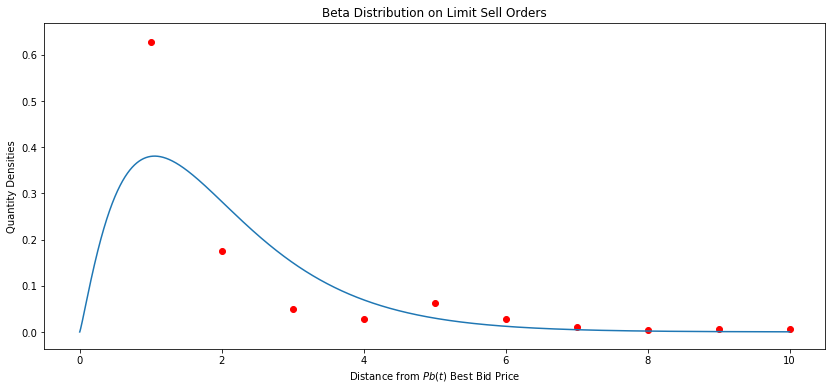

In [59]:
fit_beta_dist_and_test(orderFeatures['lambdasForLimitSellOrder'], False,
                      False, 'Beta Distribution on Limit Sell Orders')

### 2.2.3. Fitting Beta Distribution on Cancel Buy Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


a = 2.5033244635836773, b = 10040158430.946594
KstestResult(statistic=0.24156891839540215, pvalue=0.0)


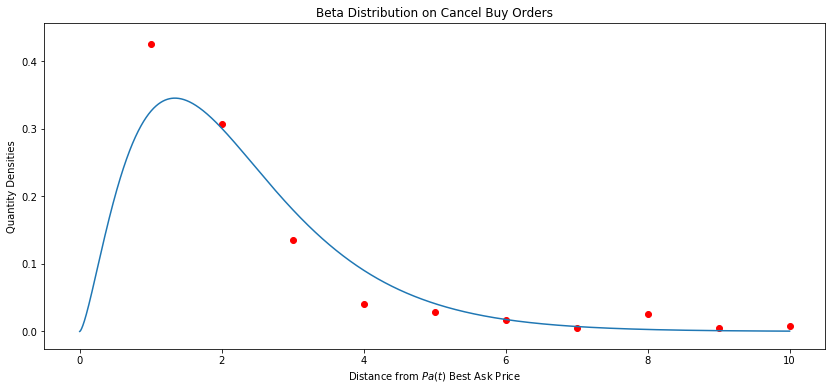

In [60]:
fit_beta_dist_and_test(orderFeatures['thetasForBuyCancelOrder'], True,
                      True, 'Beta Distribution on Cancel Buy Orders')

### 2.2.4. Fitting Beta Distribution on Cancel Sell Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


a = 2.1190318593301263, b = 740165.7415531494
KstestResult(statistic=0.21648006839573855, pvalue=8.7584568987298896e-116)


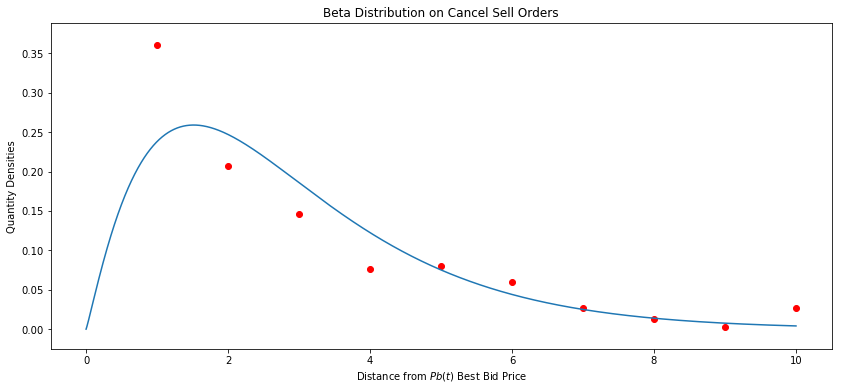

In [61]:
fit_beta_dist_and_test(orderFeatures['thetasForSellCancelOrder'], True,
                      False, 'Beta Distribution on Cancel Sell Orders')

### 2.2.5. Fitting Beta Distribution on Hourly Graphs

In [68]:
def hourly_graph_fit_beta_dist_and_test(data, cancel, buy, title):
    
    min_hour=9
    f, axes = plt.subplots(1, 6, sharey=True)
    f.suptitle('Beta Distribution on Hourly ' + title)
    hours = [10, 11, 12, 14, 15, 16, 17, 18]
    axes[0].set_ylabel("Quantity Densities")
    
    price = '$Pb(t)$'
    
    if buy:
        price='$Pa(t)$'
    
    
    for i in range(0, len(axes)):
        dat = data[hours[i+1]-min_hour]
        ks = dat[1:11]
        dt = normalizer(dat, cancel, 1, 10, True)
       
        axes[i].scatter(np.arange(1,11), ks/sum(ks), color='red')

        params = stats.beta.fit(dt, floc=1) 

        start = stats.beta.ppf(0.01, *params)
        end = stats.beta.ppf(0.99, *params)

        x = np.linspace(start, end, len(dt))
        y = stats.beta.pdf(x, *params)
        axes[i].plot(x, y)

        np.random.seed(987654321)
    
        test_res = stats.kstest(dt, 'beta', args=params)
        axes[i].set_title("{}:00 - {}:00".format(hours[i+1], hours[i+2]))
        axes[i].set_xlabel("Distance from {}\n\na: {:.4f}\nb: {:.4f}\nst: {:.4f}\np val: {:.4f}".format(price, params[0], params[1], test_res[0], test_res[1]))

#### 2.2.5.1. Fitting Beta Distribution to Hourly Limit Buy Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


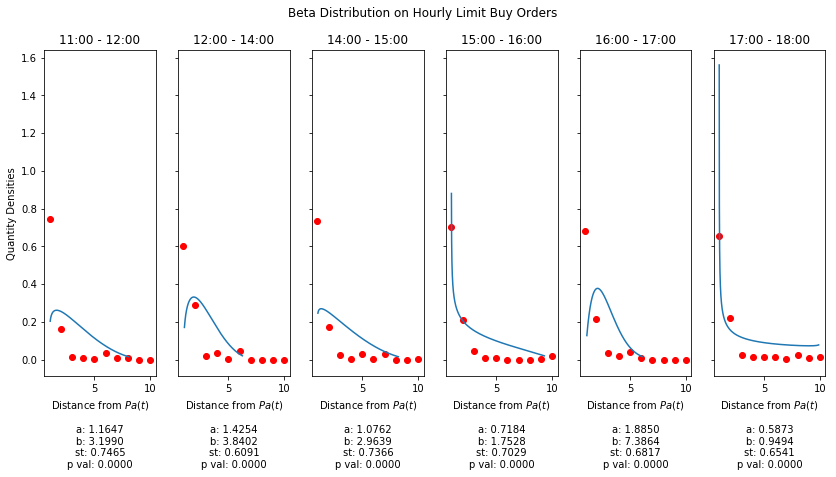

In [69]:
hourly_graph_fit_beta_dist_and_test(orderFeatures['lambdasForLimitBuyOrderHourly'], False,
                                   True, 'Limit Buy Orders')

#### 2.2.5.2. Fitting Beta Distribution to Hourly Limit Sell Orders

/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/canaltinigne/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


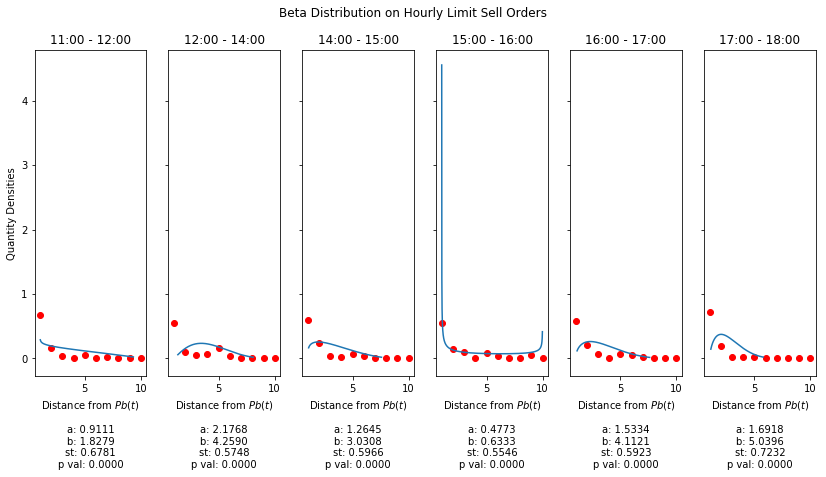

In [70]:
hourly_graph_fit_beta_dist_and_test(orderFeatures['lambdasForLimitSellOrderHourly'], False,
                                   False, 'Limit Sell Orders')

## 2.3. Fitting Weibull Distribution to Dataset

In [71]:
def fit_weib_dist_and_test(data, cancel, buyOrSell, title):
    
    ks = data[1:11]
    data = normalizer(data, cancel, 1, 10, False)
    price = '$Pb(t)$ Best Bid Price'
    
    if buyOrSell:
        price = '$Pa(t)$ Best Ask Price'
    
    plt.scatter(np.arange(1,11), ks/sum(ks), color='red')
    
    plt.xlabel('Distance from ' + price)
    plt.title(title)
    plt.ylabel('Quantity Densities')
    params = stats.weibull_min.fit(data, floc=0) 
   
    x = np.linspace(0, 10, len(data))
    y = stats.weibull_min.pdf(x, *params)
    
    plt.plot(x, y)
    
    np.random.seed(987654321)
    print("Shape (k): {}, Loc: {}, Scale (1/Lambda): {}".format(*params))
    print(stats.kstest(data, lambda data : stats.weibull_min.cdf(data, *params)))

### 2.3.1. Fitting Weibull Distribution on Limit Buy Orders

Shape (k): 1.3655522018137711, Loc: 0, Scale (1/Lambda): 1.9098643032429883
KstestResult(statistic=0.34240809315210813, pvalue=0.0)


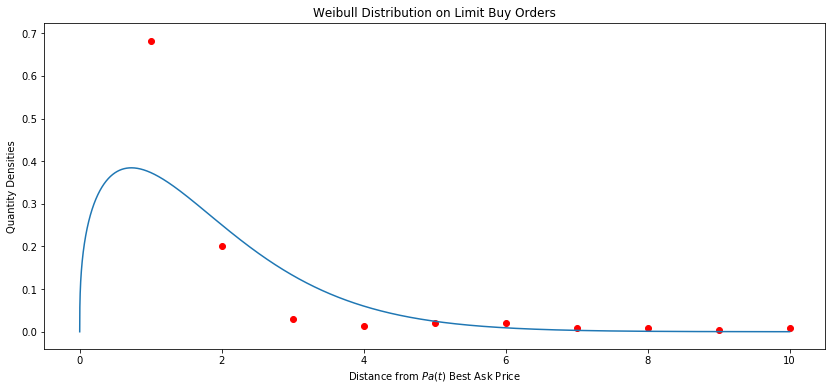

In [72]:
fit_weib_dist_and_test(orderFeatures['lambdasForLimitBuyOrder'], False,
                      True, 'Weibull Distribution on Limit Buy Orders')

### 2.3.2. Fitting Weibull Distribution on Limit Sell Orders

Shape (k): 1.353871299170728, Loc: 0, Scale (1/Lambda): 2.160357895331185
KstestResult(statistic=0.33144566707497508, pvalue=0.0)


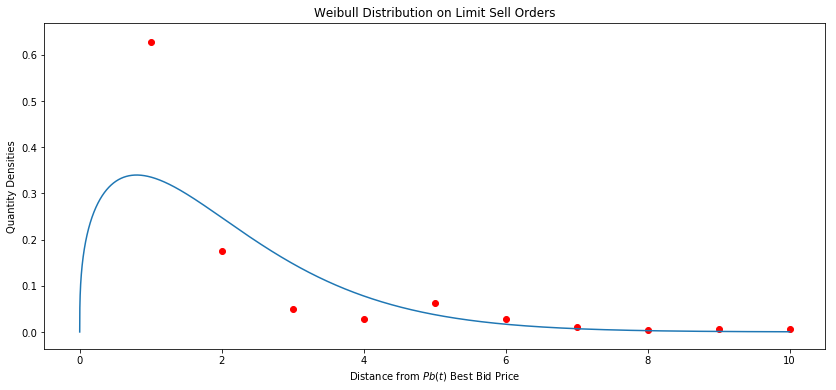

In [73]:
fit_weib_dist_and_test(orderFeatures['lambdasForLimitSellOrder'], False,
                      False, 'Weibull Distribution on Limit Sell Orders')

### 2.3.3. Fitting Weibull Distribution on Cancel Buy Orders

Shape (k): 1.4693250032618883, Loc: 0, Scale (1/Lambda): 2.4978533756893966
KstestResult(statistic=0.22935105171714595, pvalue=0.0)


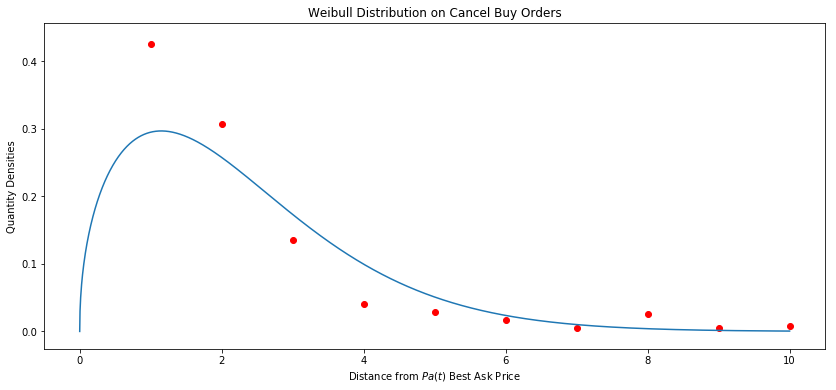

In [74]:
fit_weib_dist_and_test(orderFeatures['thetasForBuyCancelOrder'], True,
                      True, 'Weibull Distribution on Cancel Buy Orders')

### 2.3.4. Fitting Weibull Distribution on Cancel Sell Orders

Shape (k): 1.4319948283034916, Loc: 0, Scale (1/Lambda): 3.186802376047592
KstestResult(statistic=0.18777215839674302, pvalue=3.2333953236203198e-87)


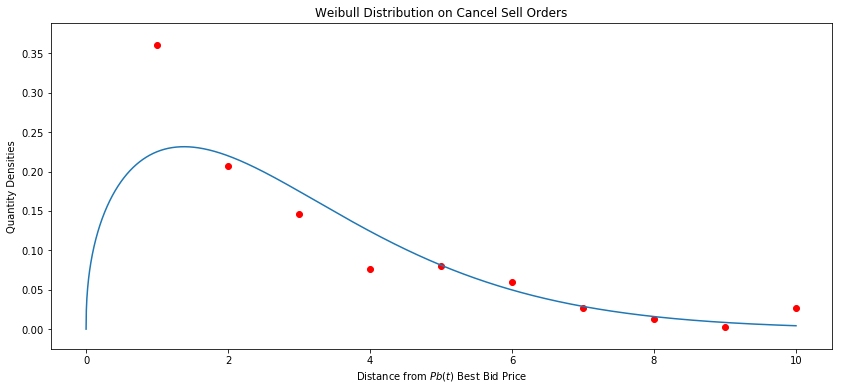

In [75]:
fit_weib_dist_and_test(orderFeatures['thetasForSellCancelOrder'], True,
                      False, 'Weibull Distribution on Cancel Sell Orders')

### 2.3.5. Fitting Weibull Distribution on Hourly Graphs

In [76]:
def hourly_graph_fit_weib_dist_and_test(data, cancel, buy, title):
        
    min_hour=9
    f, axes = plt.subplots(1, 7, sharey=True)
    f.suptitle('Weibull Distribution on Hourly ' + title)
    hours = [10, 11, 12, 14, 15, 16, 17, 18]
    axes[0].set_ylabel("Quantity Densities")
    
    price = '$Pb(t)$'
    
    if buy:
        price='$Pa(t)$'
   
    for i in range(len(axes)):
        dat = data[hours[i]-min_hour]
        ks = dat[1:11]
        dt = normalizer(dat, cancel, 1, 10, False)
        
        # Plot the histogram.
        axes[i].scatter(np.arange(1,11), ks/sum(ks), color='red')

        params = stats.weibull_min.fit(dt, floc=0) 
        
        x = np.linspace(0, 10, len(dt))
        y = stats.weibull_min.pdf(x, *params)
 
        axes[i].plot(x, y)
        
        test_res = stats.kstest(dt, 'weibull_min', args=params)
        axes[i].set_title("{}:00 - {}:00".format(hours[i], hours[i+1]))
        axes[i].set_xlabel("Distance from {}\n\nShape: {:.4f}\nLoc: {:.4f}\nScale: {:.4f}\nst: {:.4f}\np val: {:.4f}".format(price, *params, test_res[0], test_res[1]))

#### 2.3.5.1. Fitting Weibull Distribution to Hourly Limit Buy Orders

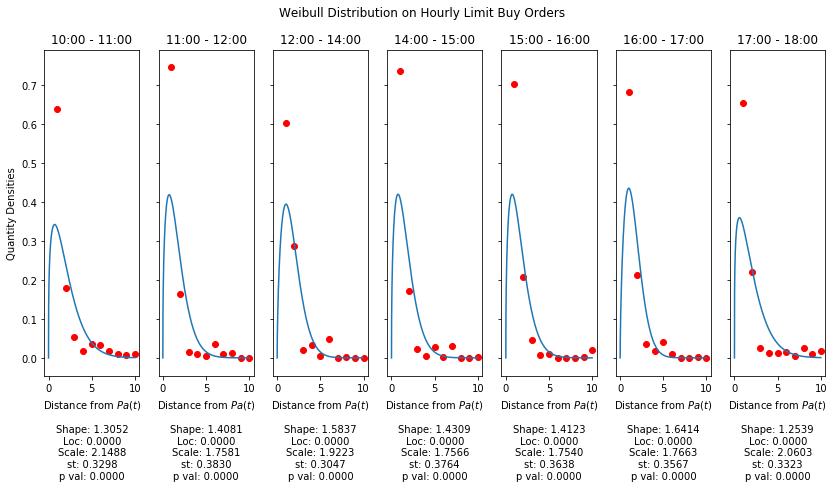

In [77]:
hourly_graph_fit_weib_dist_and_test(orderFeatures['lambdasForLimitBuyOrderHourly'], False,
                                   True, 'Limit Buy Orders')

#### 2.3.5.2. Fitting Weibull Distribution to Hourly Limit Sell Orders

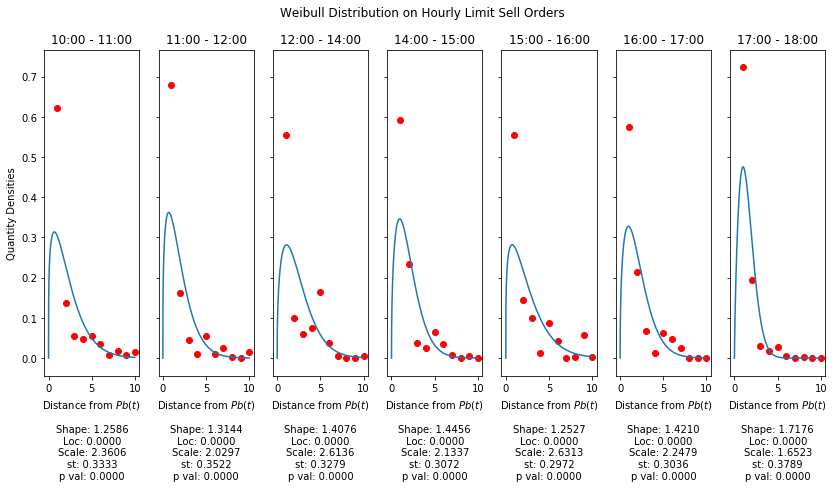

In [78]:
hourly_graph_fit_weib_dist_and_test(orderFeatures['lambdasForLimitSellOrderHourly'], False,
                                   False, 'Limit Sell Orders')

#### 2.3.5.3. Fitting Weibull Distribution to Hourly Cancel Buy Orders

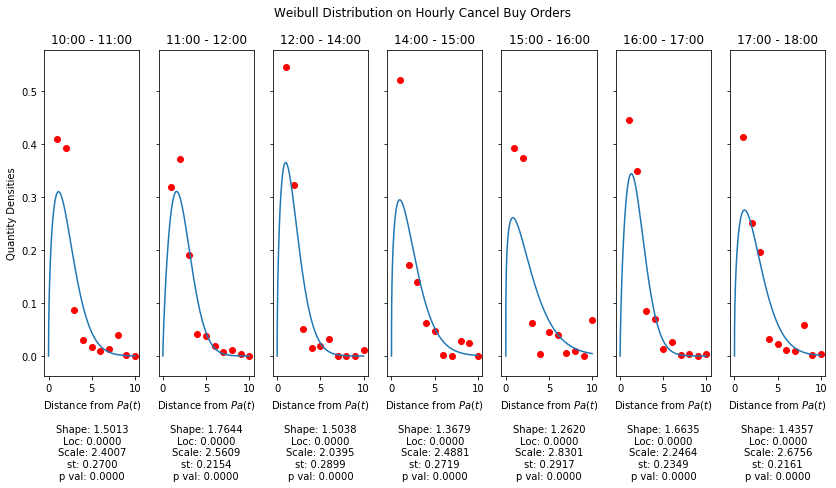

In [79]:
hourly_graph_fit_weib_dist_and_test(orderFeatures['thetasForBuyCancelOrderHourly'], True,
                                   True, 'Cancel Buy Orders')

#### 2.3.5.4. Fitting Weibull Distribution to Hourly Cancel Sell Orders

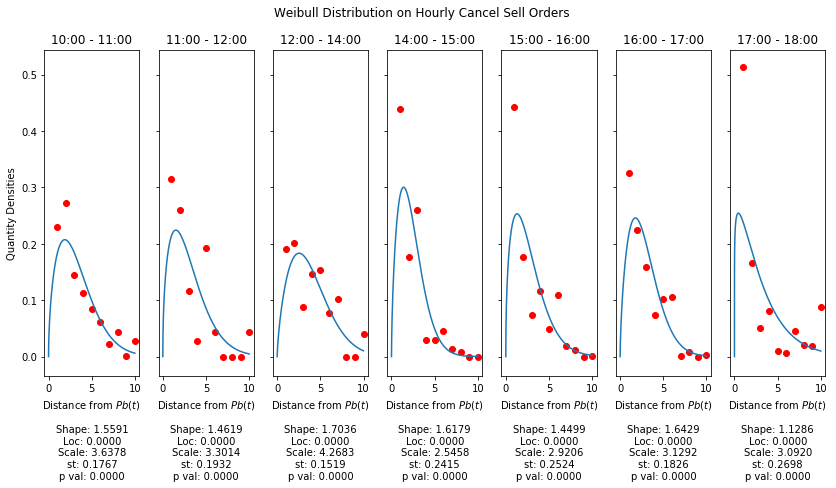

In [80]:
hourly_graph_fit_weib_dist_and_test(orderFeatures['thetasForSellCancelOrderHourly'], True,
                                   False, 'Cancel Sell Orders')

## 2.4. Fitting Gamma Distribution to Dataset

In [81]:
def fit_gamma_dist_and_test(data, cancel, buyOrSell, title):
    
    ks = data[1:11]
    data = normalizer(data, cancel, 1, 10, False)
    price = '$Pb(t)$ Best Bid Price'
    
    if buyOrSell:
        price = '$Pa(t)$ Best Ask Price'
    
    plt.scatter(np.arange(1,11), ks/sum(ks), color='red')
    plt.xlabel('Distance from ' + price)
    plt.title(title)
    plt.ylabel('Quantity Densities')
    params = stats.gamma.fit(data, floc=0) 
    print("Shape: {}, Loc: {}, Scale: {}".format(*params))
    
    x = np.linspace(0, 10, len(data))
    y = stats.gamma.pdf(x, *params)
    
    plt.plot(x, y)
    
    np.random.seed(987654321)
    print(stats.kstest(data, lambda data : stats.gamma.cdf(data, *params)))

### 2.4.1. Fitting Gamma Distribution on Limit Buy Orders

Shape: 2.50692950405602, Loc: 0, Scale: 0.6856068586338298
KstestResult(statistic=0.39542892689196291, pvalue=0.0)


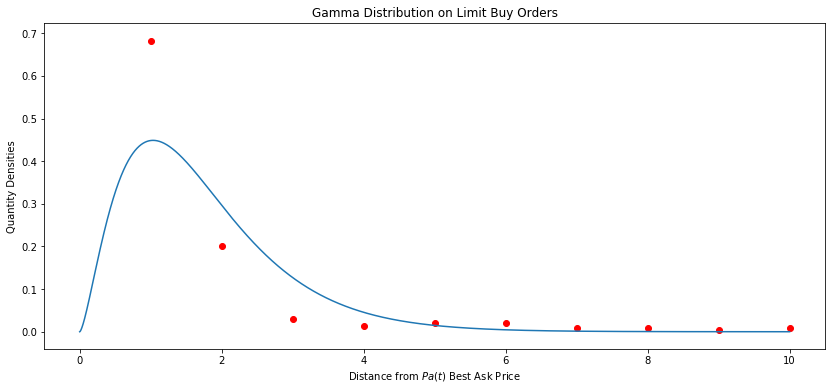

In [82]:
fit_gamma_dist_and_test(orderFeatures['lambdasForLimitBuyOrder'], False,
                       True, 'Gamma Distribution on Limit Buy Orders')

### 2.4.2. Fitting Gamma Distribution on Limit Sell Orders

Shape: 2.2014161672734303, Loc: 0, Scale: 0.8864980374695766
KstestResult(statistic=0.37261245051219888, pvalue=0.0)


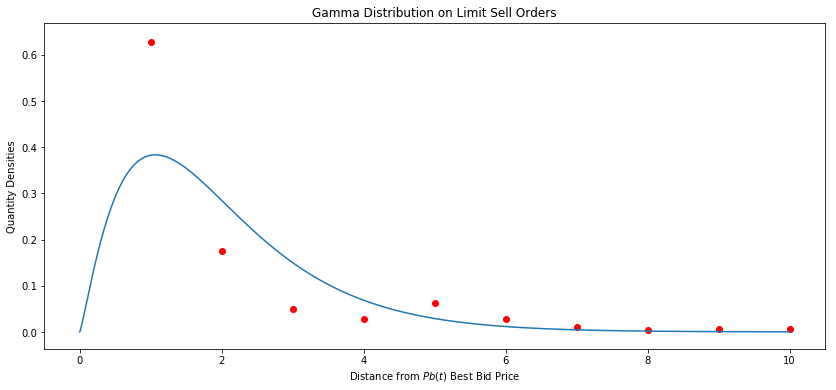

In [83]:
fit_gamma_dist_and_test(orderFeatures['lambdasForLimitSellOrder'], False,
                       False, 'Gamma Distribution on Limit Sell Orders')

### 2.4.3. Fitting Gamma Distribution on Cancel Buy Orders

Shape: 2.5032746550443408, Loc: 0, Scale: 0.8918756295240086
KstestResult(statistic=0.24157005923707983, pvalue=0.0)


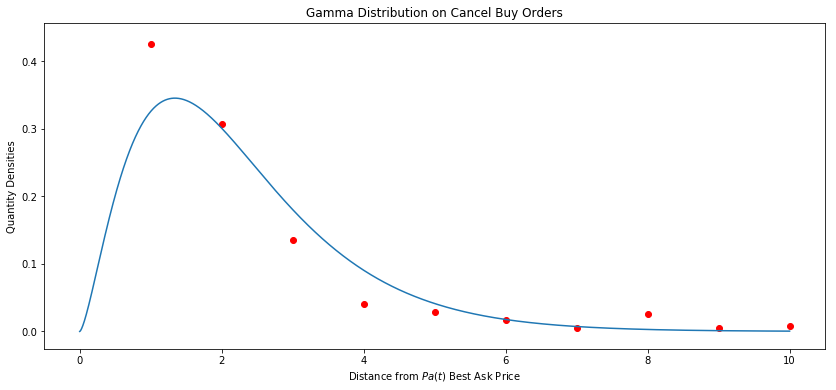

In [84]:
fit_gamma_dist_and_test(orderFeatures['thetasForBuyCancelOrder'], True,
                       True, 'Gamma Distribution on Cancel Buy Orders')

### 2.4.4. Fitting Gamma Distribution on Cancel Sell Orders

Shape: 2.076805455131955, Loc: 0, Scale: 1.3813218569560548
KstestResult(statistic=0.21291903113623556, pvalue=5.0868219496243828e-112)


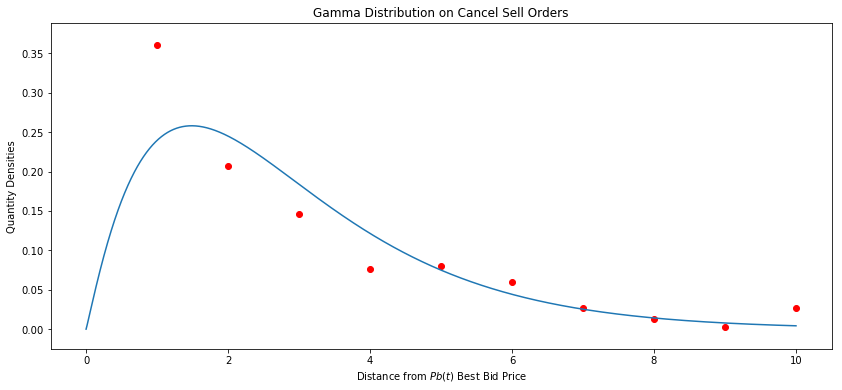

In [85]:
fit_gamma_dist_and_test(orderFeatures['thetasForSellCancelOrder'], True,
                       False, 'Gamma Distribution on Cancel Sell Orders')

### 2.4.5. Fitting Gamma Distribution on Hourly Graphs

In [86]:
def hourly_graph_fit_gamma_dist_and_test(data, cancel, buy, title):
        
    min_hour=9
    f, axes = plt.subplots(1, 7, sharey=True)
    f.suptitle('Gamma Distribution on Hourly ' + title)
    hours = [10, 11, 12, 14, 15, 16, 17, 18]
    axes[0].set_ylabel("Quantity Densities")
    
    price = '$Pb(t)$'
    
    if buy:
        price='$Pa(t)$'
   
    for i in range(len(axes)):
        dat = data[hours[i]-min_hour]
        ks = dat[1:11]
        dt = normalizer(dat, cancel, 1, 10, False)
        
        # Plot the histogram.
        axes[i].scatter(np.arange(1,11), ks/sum(ks), color='red')

        params = stats.gamma.fit(dt, floc=0) 
        
        x = np.linspace(0, 10, len(dt))
        y = stats.gamma.pdf(x, *params)
 
        axes[i].plot(x, y)
        
        np.random.seed(987654321)
        test_res = stats.kstest(dt, 'gamma', args=params)
        axes[i].set_title("{}:00 - {}:00".format(hours[i], hours[i+1]))
        axes[i].set_xlabel("Distance from {}\n\nShape: {:.4f}\nLoc: {:.4f}\nScale: {:.4f}\nst: {:.4f}\np val: {:.4f}".format(price, *params, test_res[0], test_res[1]))

#### 2.4.5.1. Fitting Gamma Distribution to Hourly Limit Buy Orders

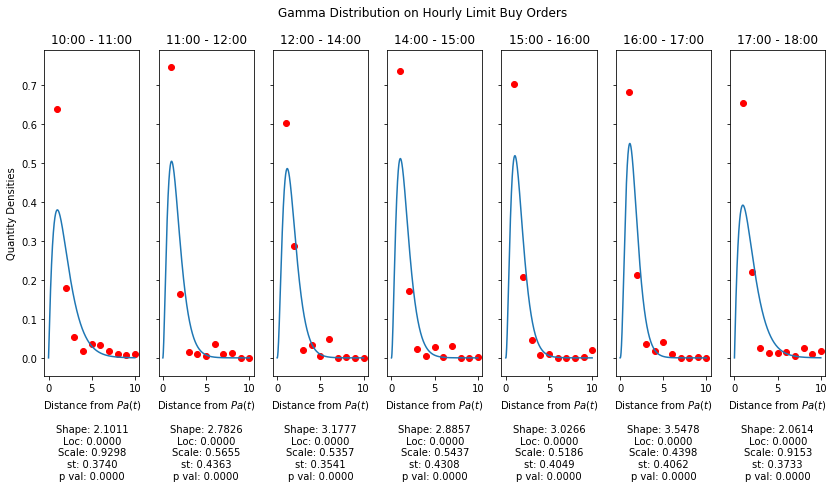

In [87]:
hourly_graph_fit_gamma_dist_and_test(orderFeatures['lambdasForLimitBuyOrderHourly'], False,
                                    True, 'Limit Buy Orders')

#### 2.4.5.2. Fitting Gamma Distribution to Hourly Limit Sell Orders

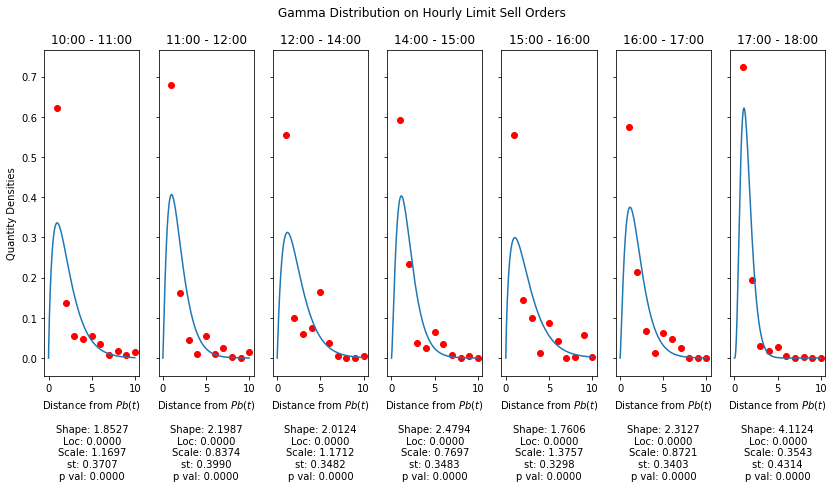

In [88]:
hourly_graph_fit_gamma_dist_and_test(orderFeatures['lambdasForLimitSellOrderHourly'], False,
                                    False, 'Limit Sell Orders')